#**Pandas in Python**

pandas is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way towards this goal.

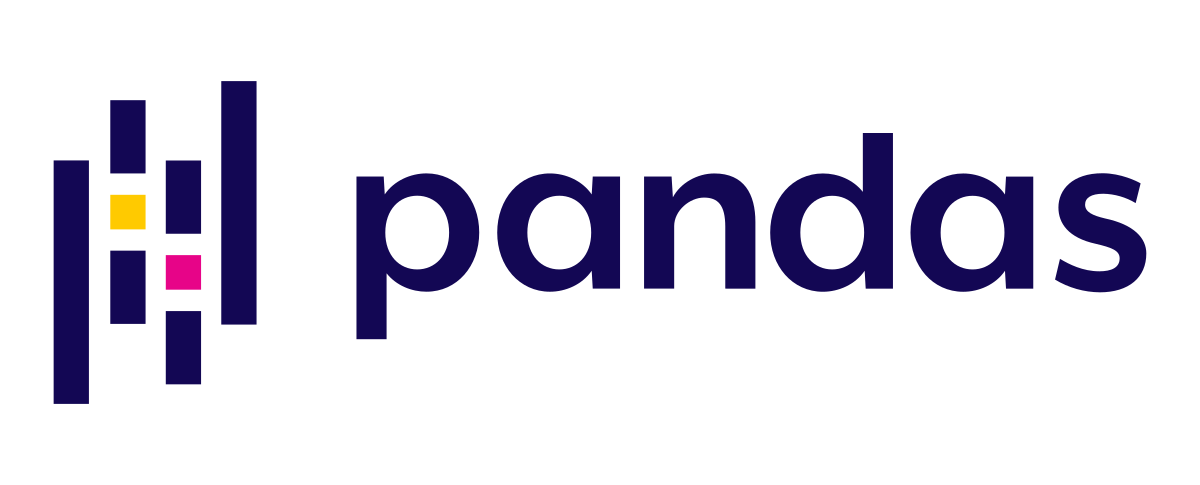

## **Basic Pandas data structures**

### **Series**

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install pandas numpy --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

The Series is a 1D NumPy array with some additional functionality.

In [ ]:
example_dict = {"Name":[" Person A", "Person B", "Person C", "Person D"],
                "Color": ["Red", "Black", "Blue", "White"],
                "Place": ["Delhi", "Mumbai", "Pune", "Bangalore"]
    
}

In [ ]:
import pandas as pd

place = pd.Series(example_dict['Place'], name='place')
place

Getting the dimensions of the series 



---
Series objects are a single column, so they only have values for the rows dimension.


In [ ]:
place.shape

Getting the data type 

In [ ]:
place.dtype

Getting the name of the series

In [ ]:
place.name

Isolating the values from the series (as an array) 

In [ ]:
place.values

### **Index**

Index built on top of Numpy

In [ ]:
place_index = place.index
place_index

In [ ]:
place_index.values

Some utilites are same as Series like,

In [ ]:
place_index.dtype

In [ ]:
place_index.shape

We can check if the values are unique:


In [ ]:
place_index.is_unique

Index determines how element-wise operations are performed. With addition, only the matching indices are summed:

In [ ]:
import numpy as np
a = pd.Series(np.linspace(0, 10, num=5))
a

In [ ]:
b=pd.Series(np.linspace(0, 10, num=5), index=pd.Index([1, 2, 3, 4, 5]))
b

In [ ]:
a+b

### **DataFrame**

You can convert your numpy arrays, list of list or list of tuples and dictionary into a pandas dataframe structure

In [ ]:
#from dictionary
example_dict

In [ ]:
df_from_dict = pd.DataFrame(example_dict)
df_from_dict

In [ ]:
#from list of list
ll = [[1 , 2], [3, 4],[5,6],[7,8]]
df = pd.DataFrame(ll, columns=["Column 1", "Column 2"])
df

In [ ]:
#from numpy arrays
data = np.array([[5.8, 2.8], [6.0, 2.2], [3.2, 5.6]])
data

In [ ]:
df = pd.DataFrame(data, columns=["Column 1", "Column 2"])
df


Isolating the values of a dataframe as a NumPy ndarray (n-dimensional array)


In [ ]:
df_from_dict.values

Getting the data types

In [ ]:
df.dtypes

Getting the dimensions of the dataframe

In [ ]:
#outputs (rows, columns)
df.shape

Reading a csv file

In [ ]:
#Data can be downloaded from https://www.kaggle.com/luddarell/101-simple-linear-regressioncsv?select=1.01.+Simple+linear+regression.csv
df = pd.read_csv("data.csv")
df

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
#saving a dataframe to a csv file
# df.to_csv('output.csv', index=False)

Inspectinga a dataframe

In [ ]:
#data can be downloaded from https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/master/ch_02/data/earthquakes.csv
df = pd.read_csv("https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/master/ch_02/data/earthquakes.csv")
df

In [ ]:
df.empty

In [ ]:
df.shape

In [ ]:
#by defaults outputs 5 rows
#starting from 0
df.head()

In [ ]:
#starting from last
df.tail()

What columns do we have?

In [ ]:
#determine the columns
df.columns

What data types do we have?

In [ ]:
df.dtypes

Getting extra info and finding nulls

In [ ]:
df.info()

Get summary statistics

In [ ]:
df.describe()



Specifying the 5th and 95th percentile:


In [ ]:
df.describe(percentiles=[0.05, 0.95])



Describe specific data types:


In [ ]:
df.describe(include=np.object)



Or describe all of them:


In [ ]:
df.describe(include='all')

.describe() works with individual column as well

In [ ]:
df.felt.describe()

Finding all the unique value in alert column

In [ ]:
df.alert.unique()



We can then use value_counts() to see how many of each unique value we have:


In [ ]:
df.alert.value_counts()

Selection of Columns

Grab an entire column using attribute notation:

In [ ]:
df.mag

OR 

Grab an entire column using dictionary syntax:


In [ ]:
df['mag']



Selecting multiple columns:


In [ ]:
df[['mag', 'title']]



Selecting columns using list comprehensions and string operations offered by pandas Series objects:


In [ ]:
df[
    ['title', 'time']
    + [col for col in df.columns if col.startswith('mag')]
]

Breaking down this example:

1. The list Comprehension

In [ ]:
[col for col in df.columns if col.startswith('mag')]

2. Assembling the list

In [ ]:
['title', 'time'] \
+ [col for col in df.columns if col.startswith('mag')]

Merging two steps

In [ ]:
df[
    ['title', 'time']
    + [col for col in df.columns if col.startswith('mag')]
]

Slicing

Selection Row

---
Using row numbers (inclusive of first index, exclusive of last):



In [ ]:
#first index is included 
#last index is not included
df[100:103]


Selecting rows and columns with chaining


In [ ]:
df[['title', 'time']][100:103]

Or

In [ ]:
df[100:103][['title', 'time']]



Order doesn't matter here:


Indexing

---
We can update particular values by selection rows & columns from above methods. If we try using what we have learned we will see the following warning often


In [ ]:
df[110:113]['title'] = df[110:113]['title'].str.lower()



Note that it worked here, but pandas says we were setting a value on a copy of a slice and that we should use loc instead (topic of the following section):


---


Now if we do this with loc as the warning suggests, everything goes smoothly. Note we have to lower the end index by one since loc is inclusive of endpoints:



In [ ]:
df.loc[110:112, 'title'] = df.loc[110:112, 'title'].str.lower()
df.loc[110:112, 'title']


Location Indexing with loc


---


Selection of the format loc[row_indexer, column_indexer] where : can be used to select all:


In [ ]:
df.loc[:,'title']

Note: 

We can use loc to select specific rows and columns without chaining. If we use row numbers with loc, they are now inclusive of the end index:


In [ ]:
df.loc[10:15, ['title', 'mag']]

Integer Location Indexing with iloc 

---
Exclusive of the endpoint just as Python slicing of lists:



In [ ]:
df.iloc[10:15, [19, 8]]



We can use slicing syntax with iloc for both rows and columns:


In [ ]:
df.iloc[10:15, 8:10]

When using loc, we can slice on column names. This will be inclusive of the endpoint because you can't be expected to know what the next column name will be. As such, we have multiple ways to achieve the same end goal:

In [ ]:
df.iloc[10:15, 8:10].equals(
    df.loc[10:14, 'mag':'magType']
)



Note there is also the take() method for There is also a take() method, which allows us to select specific row numbers (essentially iloc without having to specify the columns). For example, we can select the rows in positions 1 and 3:


In [ ]:
df.loc[10:14, 'mag':'magType'].take([1, 3])

Looking up scalar values

---

We used loc and iloc to grab subsets of the dataframe. However, if we are just interested in the specific value at a given [row, column], then we can use iat and at.

We use at with labels:

In [ ]:
df.at[10, 'mag']



...and iat with integer indices:


In [ ]:
df.iat[10,8]


Filtering

---



We can filter our dataframes using a Boolean mask, which can be made as follows:




In [ ]:
df.mag > 2



To use a mask for selection, we simply place it inside the brackets:


In [ ]:
df[df.mag >= 7.0]



We can use masks with loc:


In [ ]:
df.loc[
    df.mag >= 7.0,
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

Masks can be created using multiple criteria when combined with bitwise operators & for AND and | for OR. We must also surround each criterion with parentheses. We can't use and/or here because we need to evaluate row by row:

In [ ]:
df.loc[
    (df.tsunami == 1) & (df.alert == 'red'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]



An example with an OR condition, which is must less restrictive:


In [ ]:
df.loc[
    (df.tsunami == 1) | (df.alert == 'red'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

Masks can be any criteria that results in a Boolean. For example, we can select all earthquakes with the string Alaska in the place column with a non-null value for the alert column. To get non-nulls, we can use the isnull() method with the pandas negation operator (~) or the notnull() method:

In [ ]:
df.loc[
    (df.place.str.contains('Alaska')) & (df.alert.notnull()),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]



We can even use regular expressions here:


In [ ]:
df.loc[
    (df.place.str.contains(r'CA|California$')) & (df.mag > 3.8),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

We can use the between() method to turn 2 individual checks (is less than or equal some maximum value and is greater than or equal to some minimum value) into a single one. Note this is inclusive of the endpoint by default:

In [ ]:
df.loc[
    df.mag.between(6.5, 7.5),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]



We can use the isin() method to check for membership in a list of values:


In [ ]:
df.loc[
    df.alert.isin(['orange', 'red']),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]



We can grab the index of the minimum and maximum values of a given column and use those to select the entire row where they occur:


In [ ]:
[df.mag.idxmin(), df.mag.idxmax()]

In [ ]:
df.loc[
    [df.mag.idxmin(), df.mag.idxmax()],
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]



Using the filter() method, we can grab columns of a dataframe by passing a list to items:


In [ ]:
df.filter(items=['mag', 'magType']).head()



We can also grab all the columns that contain a string with the like parameter:


In [ ]:
df.filter(like='mag').head()



We can even use regular expressions; here, we select any columns that start with t:


In [ ]:
df.filter(regex=r'^t').head()



We can also use filter() along the rows, by passing in axis=0. Here we will use the place column as the index (we will cover set_index() in chapter 3):


In [ ]:
df.set_index('place').filter(like='Japan', axis=0).filter(items=['mag', 'magType', 'title']).head()



This also works on Series objects and will run on the index:


In [ ]:
df.set_index('place').title.filter(like='Japan').head()